In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Reading the Dataset with Pandas to process the data
df = pd.read_csv('newborn.csv')

In [25]:
# Diaplay setting of Jupyter Notebook to Visualize the data properly
pd.set_option('display.max_rows', 1000)

In [26]:
# Removed The Unwanted Columns so No Outliner are There in Data.
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [27]:
# Conversion of Categorical Data into Numerical for Liner and Logestic Regression asbthe both work on only  Numerical data
df['Transfusion Given'].replace(['Yes', 'No'],[1,0],inplace=True)

In [28]:
# Handeling The Float Values so not unaccurate Result are there regaring this particular columns
df['Hemoglobin Level (g/dL)'] = round(df['Hemoglobin Level (g/dL)'])
df['Post-transfusion Hemoglobin (g/dL)'] = round(df['Post-transfusion Hemoglobin (g/dL)'])

In [29]:
# Datatype Conversion (Float->Int) for Linear Regression
df['Post-transfusion Hemoglobin (g/dL)'] = df['Post-transfusion Hemoglobin (g/dL)'].astype(int)
df['Hemoglobin Level (g/dL)'] = df['Hemoglobin Level (g/dL)'].astype(int)

In [30]:
# Displaying The Dataset to get a Insight of it.
df

,Patient ID,Age (Days),Hemoglobin Level (g/dL),Transfusion Given,Transfusion Volume (mL),Post-transfusion Hemoglobin (g/dL)
0,1,4,5,1,26,5
1,2,9,7,1,34,7
2,3,1,7,0,0,7
3,4,1,6,0,0,6
4,5,12,7,0,0,7
5,6,9,7,1,33,7
6,7,12,9,1,18,9
7,8,1,8,1,19,8
8,9,10,6,1,30,6
9,10,11,8,0,0,8


In [31]:
# Importing the Graph Library
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 150 artists>

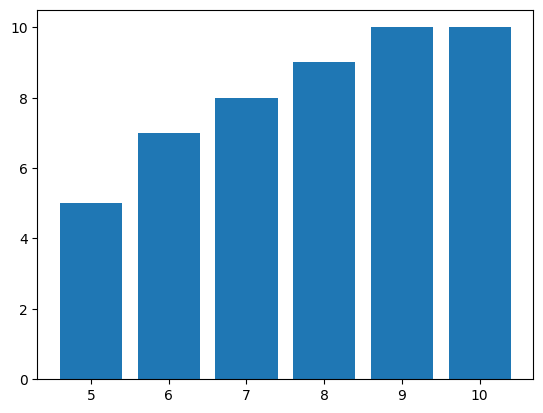

In [32]:
# Bar Graph of Hemoglobin Level V/S Post-transfusion Hemoglobin.
x = df['Hemoglobin Level (g/dL)']
y = df['Post-transfusion Hemoglobin (g/dL)']
plt.bar(x,y)

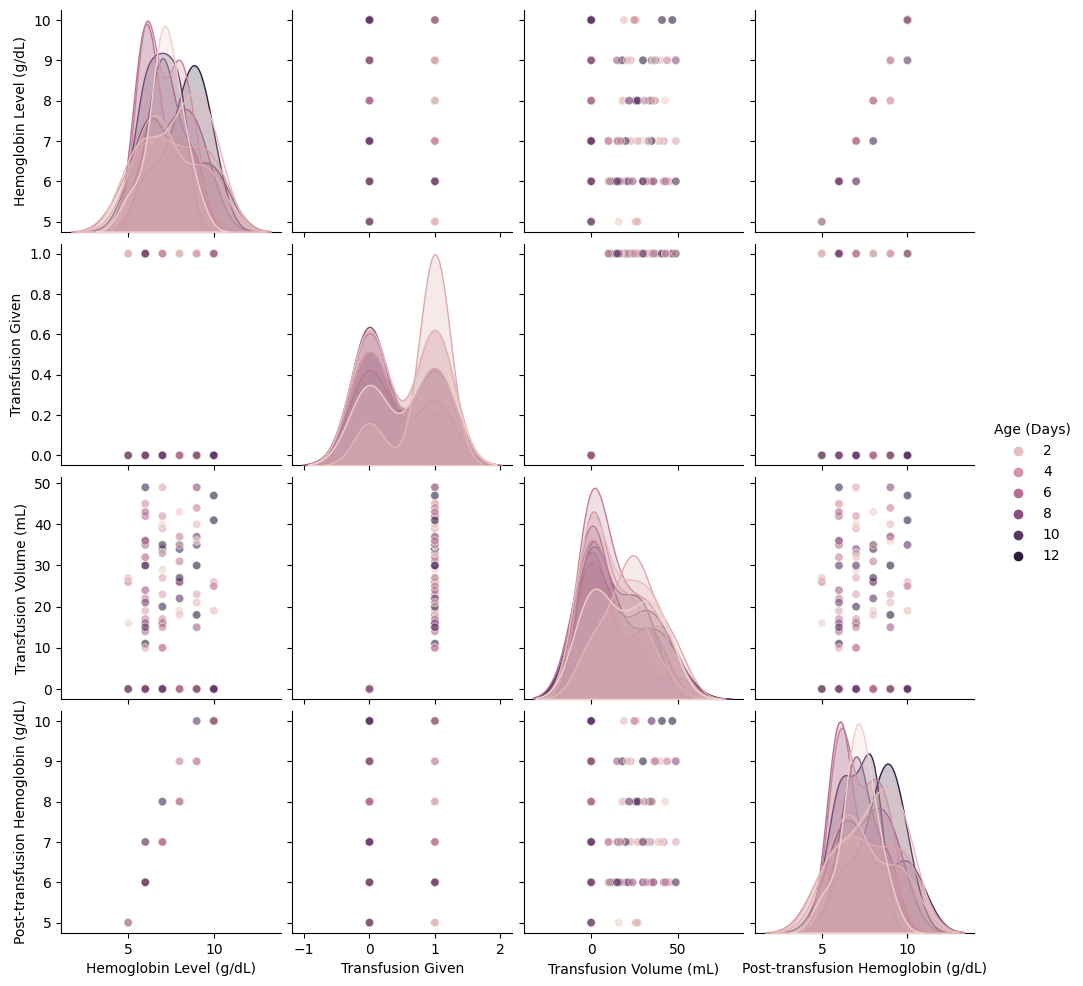

In [37]:
# Pair Plot graph of Data with respect  Age (Days) to Visualize the data and Correlation between them.
columns_of_interest = ['Age (Days)','Hemoglobin Level (g/dL)','Transfusion Given','Transfusion Volume (mL)','Post-transfusion Hemoglobin (g/dL)']
sns.pairplot(df[columns_of_interest], hue='Age (Days)', diag_kind='kde',  plot_kws={'alpha':0.6})

In [34]:
# Mathmatical view of Dataset to understand the relation of of Dataset
df.describe()

,Patient ID,Age (Days),Hemoglobin Level (g/dL),Transfusion Given,Transfusion Volume (mL),Post-transfusion Hemoglobin (g/dL)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,6.346667,7.440000,0.480000,13.833333,7.473333
std,43.445368,3.523624,1.411744,0.501274,16.216413,1.417516
min,1.000000,1.000000,5.000000,0.000000,0.000000,5.000000
25%,38.250000,3.000000,6.000000,0.000000,0.000000,6.000000
50%,75.500000,6.000000,7.000000,0.000000,0.000000,7.000000
75%,112.750000,9.750000,9.000000,1.000000,27.000000,9.000000
max,150.000000,12.000000,10.000000,1.000000,49.000000,10.000000


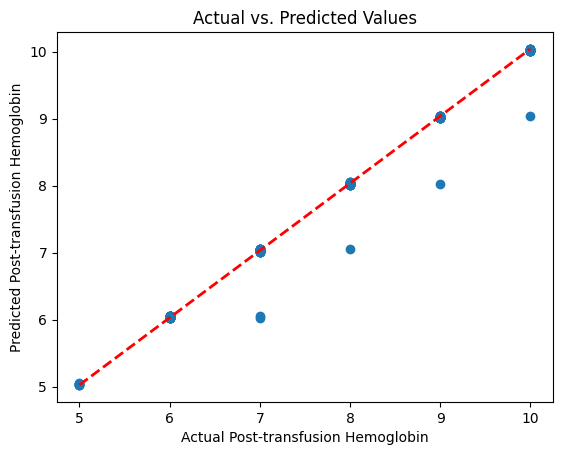

In [35]:
# Linear Regression Model
# Trying to Predict the Post_tranfusion hemoglobin with input features(Age(Days),Hemoglobin)
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Spliting Data into X and Y
X = df[["Age (Days)", "Hemoglobin Level (g/dL)"]] 
y = df["Post-transfusion Hemoglobin (g/dL)"]

model = LinearRegression() # In-built Linear Regression Model

model.fit(X, y) # Fitting The Data into Model

predicted_values = model.predict(X)

# Plotting the Linear Graph between Actual Post_transfusion and Predicted Post_tranfusion Hemoglobin to Visualize the relationship between the Actual and Predicted Values.
plt.scatter(y, predicted_values)
plt.xlabel("Actual Post-transfusion Hemoglobin")
plt.ylabel("Predicted Post-transfusion Hemoglobin")
plt.title("Actual vs. Predicted Values")



plt.plot([min(y), max(y)], [min(predicted_values), max(predicted_values)], color='red', linestyle='--', linewidth=2)
plt.show()

# Outcome Of Model is Shown with Graph Below.

In [23]:
first_row = df.loc[0]
input_features = first_row[["Age (Days)", "Hemoglobin Level (g/dL)"]]

# Convert the selected features to a NumPy array
input_array = np.array(input_features)

# Reshape the input array to match the model's input shape (if needed)
# For a single sample, reshape it to (1, number_of_features)
input_array_reshaped = input_array.reshape(1, -1)

model.predict(input_array_reshaped)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([5.03607075])

In [90]:
# Displaying Intercept and Coefficent to Chek the Outcomes of the Model.
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 0.044490264229028575
Coefficients: [0.00347459 0.99553643]


In [101]:
# Logistic Regression Model
# Trying to Predict the Transfusion Is there or Not with input features(Age(Days),Hemoglobin,Transfusion Volume,Post_transfusion Hemoglobin)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data = df

#splitting The data 

X = data[['Age (Days)', 'Hemoglobin Level (g/dL)', 'Transfusion Volume (mL)', 'Post-transfusion Hemoglobin (g/dL)']]
y = data['Transfusion Given']

# Data into into Train and Predict sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting The data into Model
model = LogisticRegression()
model.fit(X_train, y_train)

#Predcicting the Value
y_pred = model.predict(X_test)
# Used a Sample Vaules -> This Values Results in 1 i.e Tranfusion is Present
k = [[7,1,23,5]] 
z = model.predict(k)

print(z)


[1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
